In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing Natural Language Toolkit
import nltk
#Importing String for list of punctuations
import string
#Importing module for text corrections
import textblob

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.metrics import roc_Curve, auc

#Importing stopwords list
from nltk.corpus import stopwords
#Importing Lemmatizer
from nltk.stem.wordnet import WordNetLemmatizer
#Importing Tokenizer
from nltk.tokenize import RegexpTokenizer
#Importing TextBlob
from textblob import TextBlob

import os 

In [2]:
data = pd.read_csv(r'C:\Users\Dell\Desktop\data mining\Women_Dresses_Reviews_Dataset.csv',sep=',')
data

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,44,General Petite,Dresses,Dresses,1081,Love it!,I oot this dress in the blue. it fits great--h...,0,5,1
23482,23482,39,General,Dresses,Dresses,1110,Great piece,I was very patient with this dress. i was wait...,1,5,1
23483,23483,29,General Petite,Tops,Knits,862,So soft and flattering,"The deep v doesn't gape, and flatters the neck...",0,5,1
23484,23484,57,General,Dresses,Dresses,1082,Another winner from isabella sinclair,"I saw this dress online this morning, went int...",10,5,1


In [3]:
#droping null review text
data.dropna(subset = ['review_text'], axis = 0, inplace = True)
data.reset_index(inplace = True, drop = True)


In [4]:
data.describe()

,s.no,age,clothing_id,alike_feedback_count,rating,recommend_index
count,22641.000000,22641.000000,22641.000000,22641.000000,22641.000000,22641.000000
mean,11740.342520,43.280376,919.332362,2.630582,4.183561,0.818868
std,6778.534198,12.326980,202.266874,5.786164,1.115762,0.385136
min,0.000000,18.000000,1.000000,0.000000,1.000000,0.000000
25%,5873.000000,34.000000,861.000000,0.000000,4.000000,1.000000
50%,11736.000000,41.000000,936.000000,1.000000,5.000000,1.000000
75%,17617.000000,52.000000,1078.000000,3.000000,5.000000,1.000000
max,23485.000000,99.000000,1205.000000,122.000000,5.000000,1.000000


In [5]:
data.dtypes

s.no                     int64
age                      int64
division_name           object
department_name         object
class_name              object
clothing_id              int64
title                   object
review_text             object
alike_feedback_count     int64
rating                   int64
recommend_index          int64
dtype: object

In [6]:
data['word_count'] = data['review_text'].apply(lambda x: len(str(x).split(" ")))
data[['review_text','word_count']].head(20)

,review_text,word_count
0,Like other reviewers i was hesitant to spend t...,41
1,As is true of a bunch of the fall clothing pho...,99
2,"I so wanted this skirt to work, love the desig...",38
3,Love love this! i was hesitant to buy this at ...,99
4,I absolutely love the retro look of this swims...,97
5,I love this sweater but i'm on the fence about...,99
6,Love this sweater!\r\nsoft and cozy and the ru...,45
7,The sweater is comfortable and a good weight. ...,26
8,I love everything about this sweater. it is ve...,93
9,"I love this top, the details at the neck and s...",79


<AxesSubplot:xlabel='age'>

<Figure size 1080x1080 with 0 Axes>

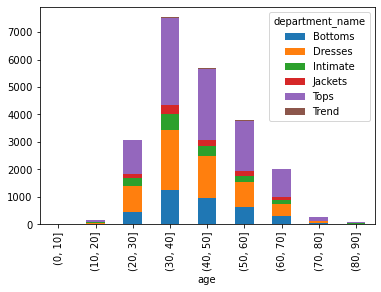

In [7]:
plt.figure(figsize=(15,15))
data.groupby(['department_name',pd.cut(data['age'],np.arange(0,100,10))])\
      .size()\
      .unstack(0)\
       .plot.bar(stacked = True)

In [8]:
len(data)

22641

In [9]:
set1 = []

for i in data.index:
    if data.rating[i]>3:
        set1.append('Good')
    else:
        set1.append('Bad')
data['rating_class'] = set1

#good = 1, bad = 0
data['binary_rating'] = 0
data.loc[data.rating_class == 'Good',['binary_rating']] = 1
data.head()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index,word_count,rating_class,binary_rating
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1,41,Good,1
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1,99,Good,1
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0,38,Bad,0
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1,99,Good,1
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1,97,Good,1


5    12540
4     4908
3     2823
2     1549
1      821
Name: rating, dtype: int64

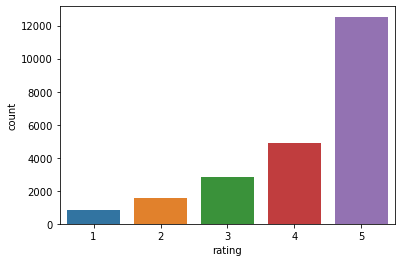

In [10]:
sns.countplot(x = 'rating', data = data)
data.rating.value_counts()

Good    17448
Bad      5193
Name: rating_class, dtype: int64

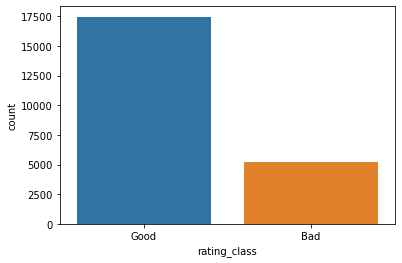

In [11]:
sns.countplot(x = "rating_class" , data = data)
data.rating_class.value_counts()


In [12]:
#clothing id with highest review counts
data.groupby(['clothing_id'])['clothing_id'].agg(counts = 'count').reset_index().sort_values(by = 'counts',ascending = False)


,clothing_id,counts
1053,1078,987
838,862,778
1069,1094,735
1056,1081,561
848,872,519
...,...,...
463,483,1
464,484,1
465,485,1
467,487,1


# Lowercasing

In [13]:
#lowercasing

data['edited_reviews'] = data['review_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#for title column
data.title[data.title.isnull()] = ''
data['edited_title'] = data['title'].apply(lambda x: " ".join(x.lower() for x in x.split()))

data['edited_title'].head()

0      amazing fit and wash
1        lovely and unique!
2                       meh
3                       wow
4    great for bigger busts
Name: edited_title, dtype: object

# Removing Punctuation

In [14]:
'''Removing Punctuation'''
data['edited_reviews'] = data['edited_reviews'].str.replace('[^\w\s]','')
data['edited_title'] = data['edited_title'].str.replace('[^\w\s]','')

data['edited_reviews'].head()

0    like other reviewers i was hesitant to spend t...
1    as is true of a bunch of the fall clothing pho...
2    i so wanted this skirt to work love the design...
3    love love this i was hesitant to buy this at f...
4    i absolutely love the retro look of this swims...
Name: edited_reviews, dtype: object

# Removing Stop Words

In [15]:
'''Removing stop words'''

from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
data['edited_reviews'] = data['edited_reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['edited_title'] = data['edited_title'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

data['edited_reviews'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    like reviewers hesitant spend much pair jeans ...
1    true bunch fall clothing photos colors totally...
2    wanted skirt work love design way way long 5 5...
3    love love hesitant buy first reviews made seem...
4    absolutely love retro look swimsuit first saw ...
Name: edited_reviews, dtype: object

# Removing Commonly Occuring words

In [16]:
'''removing commonly occuring words'''
freq = pd.Series(' '.join(data['edited_reviews']).split()).value_counts()[:10]
freq1 = pd.Series(' '.join(data['edited_title']).split()).value_counts()[:10]

freq = list(freq.index)
fre1 = list(freq1.index)

data['edited_reviews'] = data['edited_reviews'].apply(lambda x :" ".join(x for x in x.split() if x not in freq))
data['edited_title'] = data['edited_title'].apply(lambda x :" ".join(x for x in x.split() if x not in freq))

data['edited_reviews'].head()


0    reviewers hesitant spend much pair jeans howev...
1    true bunch fall clothing photos colors totally...
2    wanted skirt work design way way long 5 5 116l...
3    hesitant buy first reviews made seem big wasnt...
4    absolutely retro look swimsuit first saw blogg...
Name: edited_reviews, dtype: object

# Rare words removal

In [17]:
'''rare words removal'''

freq = pd.Series(' '.join(data['edited_reviews']).split()).value_counts()[-10:]
freq1 = pd.Series(' '.join(data['edited_title']).split()).value_counts()[-10:]

freq = list(freq.index)
freq1 = list(freq1.index)

data['edited_reviews'] = data['edited_reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['edited_title'] = data['edited_title'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

data['edited_reviews'].head(10)

0    reviewers hesitant spend much pair jeans howev...
1    true bunch fall clothing photos colors totally...
2    wanted skirt work design way way long 5 5 116l...
3    hesitant buy first reviews made seem big wasnt...
4    absolutely retro look swimsuit first saw blogg...
5    sweater fence keeping havent figured way layer...
6    sweater soft cozy ruffles overwhelmingjust tou...
7    sweater comfortable good weight zipper difficu...
8    everything sweater well made beautiful materia...
9    details neck shoulders lovely front back also ...
Name: edited_reviews, dtype: object

In [18]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Tokenize

In [19]:
'''tokenize'''
for x in range(0,22641):
    data['edited_reviews'][x] = TextBlob(data['edited_reviews'][x]).words
for x in range(0,22641):
    data['edited_title'][x] = TextBlob(data['edited_title'][x]).words
data.edited_reviews.head()

0    [reviewers, hesitant, spend, much, pair, jeans...
1    [true, bunch, fall, clothing, photos, colors, ...
2    [wanted, skirt, work, design, way, way, long, ...
3    [hesitant, buy, first, reviews, made, seem, bi...
4    [absolutely, retro, look, swimsuit, first, saw...
Name: edited_reviews, dtype: object

# Lemmatization

In [20]:
'''Lemmatization'''

lem = WordNetLemmatizer()


data['edited_reviews'] = data['edited_reviews'].apply(lambda x: ([lem.lemmatize(word, pos ='n') for word in x]))
data['edited_reviews'] = data['edited_reviews'].apply(lambda x: ([lem.lemmatize(word, pos = 'r') for word in x]))
data['edited_reviews'] = data['edited_reviews'].apply(lambda x :([lem.lemmatize(word, pos ='v') for word in x]))
data['edited_reviews'] = data['edited_reviews'].apply(lambda x: ([lem.lemmatize(word, pos = 'a') for word in x]))

data['edited_title'] = data['edited_title'].apply(lambda x: ([lem.lemmatize(word, pos = 'n') for word in x]))
data['edited_title'] = data['edited_title'].apply(lambda x: ([lem.lemmatize(word, pos = 'r') for word in x]))
data['edited_title'] = data['edited_title'].apply(lambda x: ([lem.lemmatize(word, pos = 'v') for word in x]))
data['edited_title'] = data['edited_title'].apply(lambda x: ([lem.lemmatize(word, pos = 'a') for word in x]))

data.edited_reviews.head()

0    [reviewer, hesitant, spend, much, pair, jean, ...
1    [true, bunch, fall, clothe, photo, color, tota...
2    [want, skirt, work, design, way, way, long, 5,...
3    [hesitant, buy, first, review, make, seem, big...
4    [absolutely, retro, look, swimsuit, first, saw...
Name: edited_reviews, dtype: object

# Removing words without meaning

In [21]:
'''removing words without meaning'''
from nltk.corpus import wordnet
for i in data.index:
    only_recognized_words = []
    for t in data.edited_reviews[i]:
        if wordnet.synsets(t):
            if t.isalpha():
                only_recognized_words.append(t)
    data.edited_reviews[i] = only_recognized_words

for i in data.index:
    only_recognized_words = []
    for t in data.edited_title[i]:
        if wordnet.synsets(t):
            if t.isalpha():
                only_recognized_words.append(t)
    data.edited_title[i] = only_recognized_words
data.edited_reviews.head()
    

0    [reviewer, hesitant, spend, much, pair, jean, ...
1    [true, bunch, fall, clothe, photo, color, tota...
2    [want, skirt, work, design, way, way, long, sm...
3    [hesitant, buy, first, review, make, seem, big...
4    [absolutely, retro, look, swimsuit, first, saw...
Name: edited_reviews, dtype: object

In [22]:
'''joining data for model application'''
for i in range(0,22641):
    data.edited_reviews[i] = ' '.join(data.edited_reviews[i])
    data.edited_title[i] = ' '.join(data.edited_title[i])
    

In [23]:
f_data = data[['edited_title','edited_reviews','rating','rating_class','binary_rating']]
f_data.head()

,edited_title,edited_reviews,rating,rating_class,binary_rating
0,amaze wash,reviewer hesitant spend much pair jean however...,5,Good,1
1,lovely unique,true bunch fall clothe photo color totally was...,5,Good,1
2,,want skirt work design way way long small inch...,1,Bad,0
3,wow,hesitant buy first review make seem big sure k...,5,Good,1
4,big bust,absolutely retro look swimsuit first saw blogg...,5,Good,1


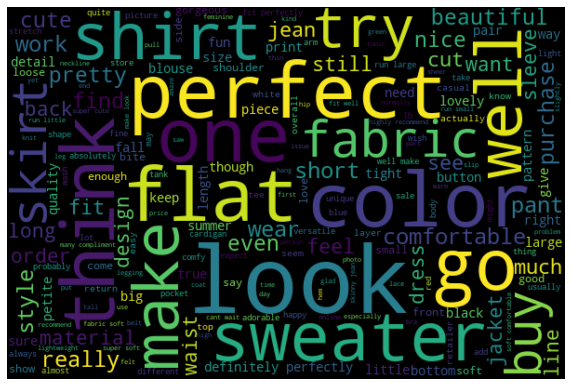

In [24]:
#wordCLoud
from wordcloud import WordCloud
good_words = ' '.join([text for text in f_data[f_data.rating_class == 'Good']['edited_reviews']])
wordcloud = WordCloud(width = 600, height = 400, random_state = 21, max_font_size = 100).generate(good_words)
plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

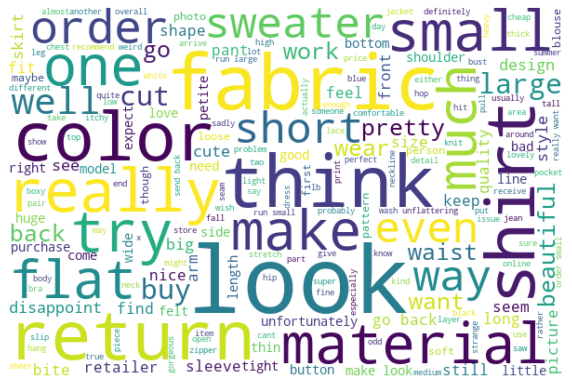

In [25]:
from wordcloud import WordCloud
bad_words = ' '.join([text for text in f_data[f_data.rating_class == 'Bad']['edited_reviews']])
wordcloud = WordCloud(width = 600, height = 400, random_state = 21,background_color="white", max_font_size = 100).generate(bad_words)
plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [26]:
#Text Polarity
f_data['Polarity'] = f_data['edited_reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)
f_data.head(5)

,edited_title,edited_reviews,rating,rating_class,binary_rating,Polarity
0,amaze wash,reviewer hesitant spend much pair jean however...,5,Good,1,0.387500
1,lovely unique,true bunch fall clothe photo color totally was...,5,Good,1,0.219444
2,,want skirt work design way way long small inch...,1,Bad,0,-0.150000
3,wow,hesitant buy first review make seem big sure k...,5,Good,1,0.283333
4,big bust,absolutely retro look swimsuit first saw blogg...,5,Good,1,0.062202


In [27]:
print("Running sentiment process")
for row in f_data.itertuples():
    review = f_data.at[row[0], 'edited_reviews']
#run sentiment using TextBlob
    analysis = TextBlob(review)
#set value to dataframe
    f_data.at[row[0], 'polarity'] = analysis.sentiment[0]
    f_data.at[row[0], 'subjectivity'] = analysis.sentiment[1]
#Create Positive / negative column depending on polarity
    if analysis.sentiment[0]>0:
        f_data.at[row[0], 'sentiment'] = "Positive"
    else:
        f_data.at[row[0], 'sentiment'] = "Negative"
        
        
        
        
        
        
   

Running sentiment process


In [28]:
data1 = f_data[["edited_reviews","polarity","sentiment"]]
data1


,edited_reviews,polarity,sentiment
0,reviewer hesitant spend much pair jean however...,0.387500,Positive
1,true bunch fall clothe photo color totally was...,0.219444,Positive
2,want skirt work design way way long small inch...,-0.150000,Negative
3,hesitant buy first review make seem big sure k...,0.283333,Positive
4,absolutely retro look swimsuit first saw blogg...,0.062202,Positive
...,...,...,...
22636,blue fit knee short awkwardly long wish short ...,0.241667,Positive
22637,patient wait almost forever till get sale try ...,0.257738,Positive
22638,deep v gape flat neckline side slit reveal eno...,0.181746,Positive
22639,saw online morning go store afternoon walk bra...,0.015201,Positive


In [29]:
data1.to_csv('processedreviews.csv')

<AxesSubplot:ylabel='Frequency'>

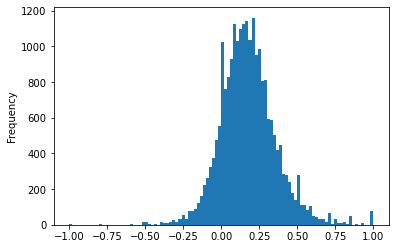

In [30]:
f_data['Polarity'].plot(kind='hist', bins=100)

# Train and Test

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1, data1.sentiment, test_size=0.30, random_state=42 ,stratify=data1["sentiment"])

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [34]:
le1 = LabelEncoder()
y_test = le1.fit_transform(y_test)

In [35]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(15848, 3) (15848,)
(6793, 3) (6793,)


# Vectorization

In [36]:
vec = CountVectorizer()
vec.fit(X_train.edited_reviews)
train_x_bow = vec.transform(X_train.edited_reviews)
test_x_bow = vec.transform(X_test.edited_reviews)

In [37]:
print(train_x_bow.shape)
print(test_x_bow.shape)

(15848, 6231)
(6793, 6231)


# Naivebayes

In [49]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from collections import Counter
classfier = MultinomialNB()

In [50]:
alpha_ranges = {"alpha":[10**-2,10**-1,10**0,10**1,10**2]}
grid_search =GridSearchCV(classfier , param_grid = alpha_ranges ,scoring= "accuracy",cv=3,return_train_score = True)
grid_search.fit(train_x_bow,y_train)

GridSearchCV(cv=3, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             return_train_score=True, scoring='accuracy')

In [51]:
alpha = [10**-2,10**-1,10**0,10**1,10**2]
train_acc = grid_search.cv_results_['mean_train_score']
train_std = grid_search.cv_results_['std_train_score']
test_acc = grid_search.cv_results_['mean_test_score']
test_std = grid_search.cv_results_['std_test_score']

In [52]:
grid_search.best_estimator_

MultinomialNB(alpha=1)

In [53]:
classifier = MultinomialNB(alpha=1)
classifier.fit(train_x_bow,y_train)

MultinomialNB(alpha=1)

In [54]:
predict = classifier.predict(test_x_bow)

In [57]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
predicted = classifier.predict(test_x_bow)
predicted_trn = classifier.predict(train_x_bow)
print('Train Accuracy', accuracy_score(y_train, predicted_trn))
print('Test Accuracy', accuracy_score(y_test, predicted))
print(classification_report(y_test,predict))


Train Accuracy 0.9011862695608278
Test Accuracy 0.8763432945679376
              precision    recall  f1-score   support

           0       0.66      0.35      0.46      1018
           1       0.89      0.97      0.93      5775

    accuracy                           0.88      6793
   macro avg       0.78      0.66      0.70      6793
weighted avg       0.86      0.88      0.86      6793



[[ 360  658]
 [ 182 5593]]


<AxesSubplot:>

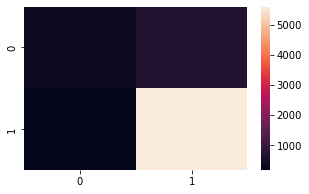

In [58]:
cm = confusion_matrix(y_test, predict)
print(cm)
plt.figure(figsize = (5,3))
sns.heatmap(cm)

In [59]:
edited_reviews = ["i hate shirt"]
text_vec = vec.transform(edited_reviews)

classifier.predict(text_vec)

array([0])

In [60]:
le.inverse_transform([0])

array(['Negative'], dtype=object)

In [61]:
edited_reviews = ["this shirt fits me perfectly"]
text_vec = vec.transform(edited_reviews)

classifier.predict(text_vec)

array([1])

In [62]:
le.inverse_transform([1])

array(['Positive'], dtype=object)

# KNN

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from collections import Counter

In [64]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier(n_neighbors = 7)

clf = knn.fit(train_x_bow, y_train)

#input data to predict their classes of the given categories
predicted = clf.predict(test_x_bow)

In [65]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
predicted = clf.predict(test_x_bow)
predicted_trn = clf.predict(train_x_bow)
print('Train Accuracy', accuracy_score(y_train, predicted_trn))
print('Test Accuracy', accuracy_score(y_test, predicted))
print(classification_report(y_test, predicted))


Train Accuracy 0.8334174659262998
Test Accuracy 0.7628441042249374
              precision    recall  f1-score   support

           0       0.32      0.53      0.40      1018
           1       0.91      0.80      0.85      5775

    accuracy                           0.76      6793
   macro avg       0.61      0.67      0.63      6793
weighted avg       0.82      0.76      0.78      6793



[[ 535  483]
 [1128 4647]]


<AxesSubplot:>

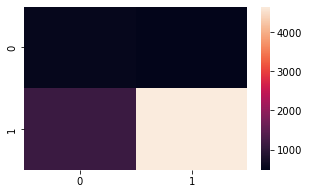

In [66]:
cm = confusion_matrix(y_test, predicted)
print(cm)
plt.figure(figsize = (5,3))
sns.heatmap(cm)

In [67]:
edited_reviews = ["i hate shirt"]
text_vec = vec.transform(edited_reviews)

classifier.predict(text_vec)

array([0])

In [68]:
le.inverse_transform([0])

array(['Negative'], dtype=object)

In [69]:
edited_reviews = ["i like it"]
text_vec = vec.transform(edited_reviews)

classifier.predict(text_vec)

array([1])

In [70]:
le.inverse_transform([1])

array(['Positive'], dtype=object)